## Imports

In [1]:
from giraffe.giraffe import Giraffe
from giraffe.node import MeanNode, MaxNode, MinNode
from giraffe.callback import EarlyStoppingCallback, SaveParetoCallback
from giraffe.fitness import average_precision_fitness
from giraffe.draw import draw_tree
from giraffe.tree import Tree
from pathlib import Path
import numpy as np
import torch

## Settings

In [2]:
population_size = 15
population_multiplier = 2 # additional population will have 30 inviduals (+ 15 from the original population)
max_generations = 100
tournament_size = 5 # for each crossover, 5 random population members will be selected and 2 best will produce offspring
callbacks = [EarlyStoppingCallback(10), SaveParetoCallback(path="../saved_trees", filename="pareto_tree")]
preds_source = Path("../test_probs")
gt_path = Path("../gt/test_labels.pt")
fitness_function = average_precision_fitness

## Define trainer

In [3]:
trainer = Giraffe(
    preds_source=preds_source,
    gt_path=gt_path,
    population_size=population_size,
    population_multiplier=population_multiplier,
    tournament_size=tournament_size,
    fitness_function=fitness_function,
    allowed_op_nodes=[MeanNode, MaxNode, MinNode],
    callbacks=callbacks,
    seed=42,
    backend='torch'
)

## Train the model

In [4]:
population = trainer.train(iterations=max_generations)

 95%|█████████▌| 95/100 [00:02<00:00, 45.48it/s]

Patience reached, stopping evolution...


## Find model with highest fitness

In [5]:
highest_fitness_model = population[np.argmax(trainer.fitnesses)]

## Draw the tree

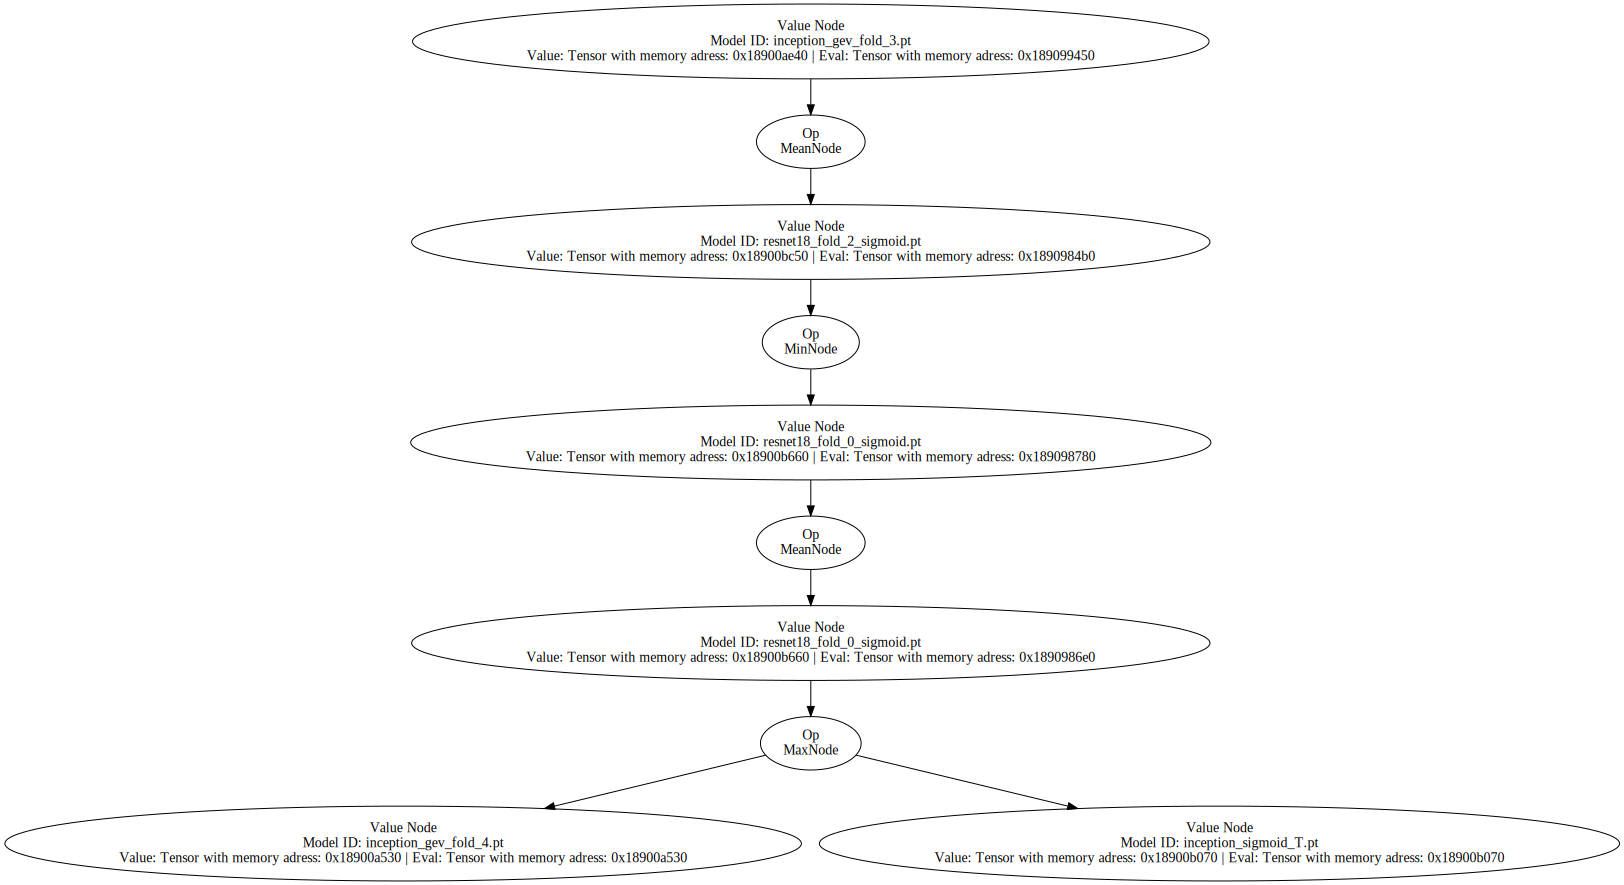

In [6]:
draw_tree(highest_fitness_model)

## Load saved tree with preds from dir and evaluate it

In [7]:
tree, tensors = Tree.load_tree("../saved_trees/pareto_tree_2.tree", preds_source)

In [8]:
gt = torch.load(gt_path).numpy()

In [9]:
preds = tree.evaluation.numpy()

In [10]:
from sklearn.metrics import roc_auc_score

In [11]:
roc_auc_score(gt, preds)

0.9878240377062057